In [13]:
import scipy.io as sio
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage import io, segmentation as seg
from skimage.segmentation import mark_boundaries

from name2dir import name2dir


In [14]:
def showRGB(hsi, RGBC = [54, 34, 14]):
    r_band = hsi[:, :, RGBC[0]]
    g_band = hsi[:, :, RGBC[1]]
    b_band = hsi[:, :, RGBC[2]]
    toseg = np.dstack((r_band, g_band, b_band))
    plt.imshow(toseg)
    return toseg
    # plt.figure()
    # detectmap = input_data['map']
    # plt.imshow(detectmap, cmap='Blues')
    

In [15]:
data_name = "1_"
data_path = name2dir[data_name]
input_data = sio.loadmat(os.path.expanduser(data_path))

In [16]:
img = input_data["data"]
img = img / img.max()
img.shape

(100, 100, 204)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.03960967650033796..1.0323769389542157].


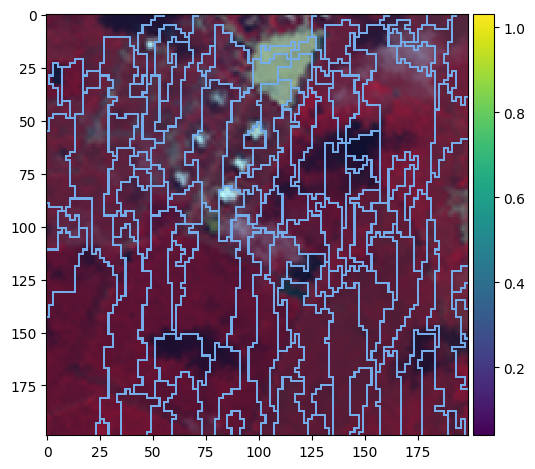

In [24]:
toseg = showRGB(img, [54, 34, 14])

segments = seg.slic(toseg, n_segments=100, compactness=0.01, max_num_iter=1000, channel_axis=2)
boundaries_img = mark_boundaries(toseg, segments, mode='subpixel', color=np.array((116,173,233))/255)

io.imshow(boundaries_img)
io.show()

In [23]:
# uncomment this to save the segments
input_data[f'segs1'] = segments
sio.savemat(os.path.expanduser(data_path), input_data)